In [11]:
# imports + load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

ROOT = Path("..")   # adjust if your notebook path differs
fn = ROOT/"data"/"processed"/"ev_population_imputed.csv"
df = pd.read_csv(fn)
pd.options.display.max_columns = 200
df.shape, df.head(3)


((112634, 21),
    VIN (1-10)  County      City State  Postal Code  Model Year       Make  \
 0  JTMEB3FV6N  Monroe  Key West    FL      33040.0      2022.0     TOYOTA   
 1  1G1RD6E45D   Clark  Laughlin    NV      89029.0      2013.0  CHEVROLET   
 2  JN1AZ0CP8B  Yakima    Yakima    WA      98901.0      2011.0     NISSAN   
 
         Model                   Electric Vehicle Type  \
 0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
 1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
 2        LEAF          Battery Electric Vehicle (BEV)   
 
   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
 0           Clean Alternative Fuel Vehicle Eligible            42.0   
 1           Clean Alternative Fuel Vehicle Eligible            38.0   
 2           Clean Alternative Fuel Vehicle Eligible            73.0   
 
    Base MSRP  Legislative District  DOL Vehicle ID  \
 0        0.0           5199.507363     198968248.0   
 1        0.0           2178.249040  

In [12]:
#  structure and missingness check (confirm imputed flags)
print("Rows, cols:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nTop missing percentages:")
print((df.isna().mean().sort_values(ascending=False).head(20)).to_string())
# show any _was_missing flags
print("\nImputation flags sample columns:")
print([c for c in df.columns if c.endswith("_was_missing")][:20])


Rows, cols: (112634, 21)

Columns:
 ['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract', 'Legislative District_was_missing', 'Model_was_missing', 'Vehicle Location_was_missing', 'Electric Utility_was_missing']

Top missing percentages:
VIN (1-10)                                           0.0
County                                               0.0
City                                                 0.0
State                                                0.0
Postal Code                                          0.0
Model Year                                           0.0
Make                                                 0.0
Model                                                0.0
Electric Vehicle Type                                0.0
Clea

In [13]:
df.info()
df.select_dtypes(include=[np.number]).describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 21 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  float64
 5   Model Year                                         112634 non-null  float64
 6   Make                                               112634 non-null  object 
 7   Model                                              112634 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

,count,mean,std,min,25%,50%,75%,max
Postal Code,112634.0,9.815623e+04,2.648733e+03,1.730000e+03,9.805200e+04,9.811900e+04,9.837000e+04,9.970100e+04
Model Year,112634.0,2.019003e+03,2.892364e+00,1.997000e+03,2.017000e+03,2.020000e+03,2.022000e+03,2.023000e+03
Electric Range,112634.0,8.781299e+01,1.023342e+02,0.000000e+00,0.000000e+00,3.200000e+01,2.080000e+02,3.370000e+02
Base MSRP,112634.0,1.793440e+03,1.078375e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,112634.0,3.875516e+01,1.922083e+02,1.000000e+00,1.800000e+01,3.400000e+01,4.300000e+01,6.156427e+03
DOL Vehicle ID,112634.0,1.994567e+08,9.398427e+07,4.777000e+03,1.484142e+08,1.923896e+08,2.191899e+08,4.792548e+08
2020 Census Tract,112634.0,5.296650e+10,1.699104e+09,1.101001e+09,5.303301e+10,5.303303e+10,5.305307e+10,5.603300e+10
Legislative District_was_missing,112634.0,2.539198e-03,5.032666e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Model_was_missing,112634.0,1.775663e-04,1.332428e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Vehicle Location_was_missing,112634.0,2.130795e-04,1.459575e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [14]:
#  Check how many rows were partially missing (from your earlier output)
df['_missing_frac'] = df.isna().mean(axis=1)
df['_missing_frac'].value_counts().sort_index().head(20)

_missing_frac
0.0    112634
Name: count, dtype: int64

✅ Applied random style: 'earth_tone' with colors ['#6B4226', '#D9BF77', '#AC6C82', '#3E5C76', '#9BC1BC']


C:\Users\jatin\AppData\Local\Temp\ipykernel_17620\2608247898.py:61: UserWarning:

Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.

C:\Users\jatin\AppData\Local\Temp\ipykernel_17620\2608247898.py:65: UserWarning:

Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.

c:\Users\jatin\OneDrive\Desktop\Projects\electric-vehicle-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.



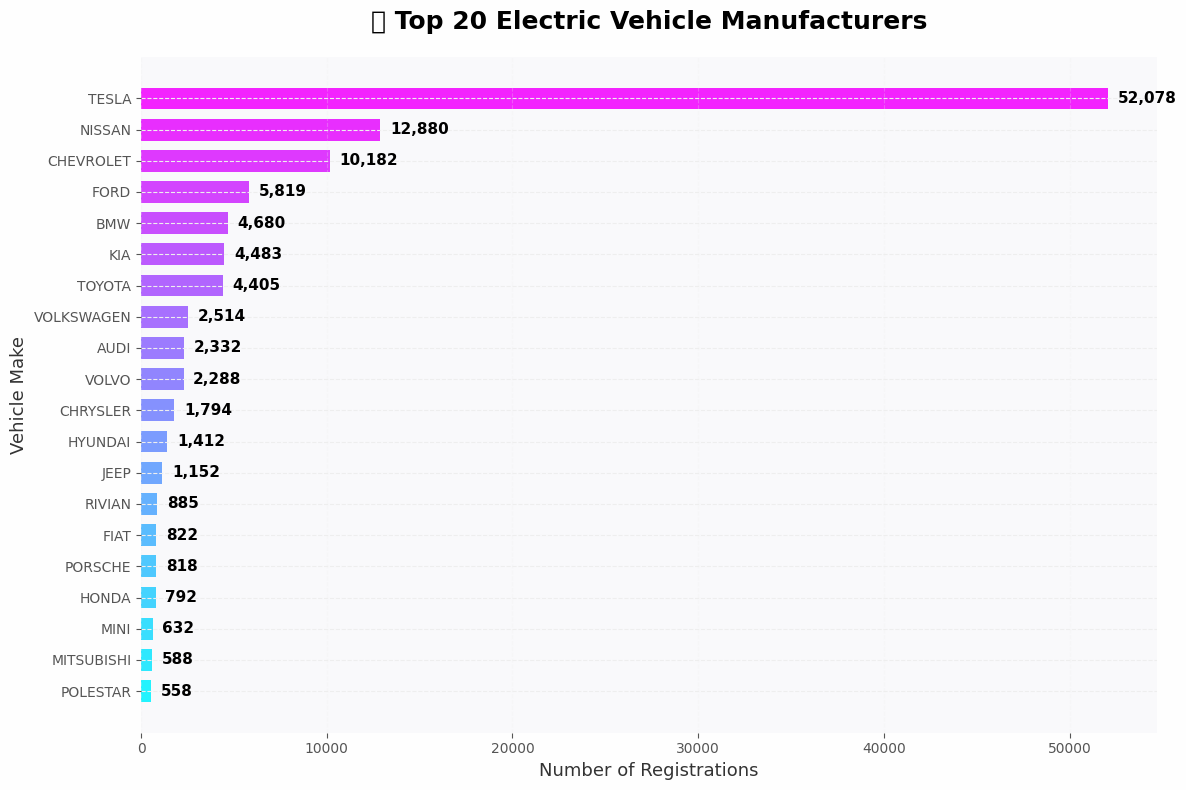

In [15]:
#  Top manufacturers (Make) and counts — bar chart
# Top 20 EV Makes 

import sys, os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Add src path and import your visual style system
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from src.visual_style import randomize_palette

# Apply a random trending color palette
randomize_palette()

# Load processed EV dataset
file_path = "../data/processed/ev_population_imputed.csv"
df = pd.read_csv(file_path)

# --- Data Preparation ---
make_counts = df['Make'].value_counts().head(20).sort_values(ascending=True)

plt.figure(figsize=(12, 8))

# Create a soft gradient color palette
colors = sns.color_palette("cool", len(make_counts))

bars = plt.barh(
    make_counts.index,
    make_counts.values,
    color=colors,
    edgecolor="none",
    height=0.7
)

# --- Add effects ---
# Rounded bar edges
for bar in bars:
    bar.set_linewidth(0)
    bar.set_alpha(0.9)

# Add count annotations on bars
for i, (value, name) in enumerate(zip(make_counts.values, make_counts.index)):
    plt.text(value + (max(make_counts.values) * 0.01), i, f"{value:,}", va='center', fontsize=11, weight='bold')

# Add subtle background styling
plt.title("🌈 Top 20 Electric Vehicle Manufacturers", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Number of Registrations", fontsize=13)
plt.ylabel("Vehicle Make", fontsize=13)
plt.grid(axis='x', alpha=0.25, linestyle='--')

# Glow-like shadow effect for visual appeal
plt.gca().set_facecolor("#f9f9fb")
plt.gcf().patch.set_facecolor("#fefefe")

# Add gradient-like illusion
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()

# Save chart
os.makedirs("../reports/figures", exist_ok=True)
plt.savefig("../reports/figures/top20_makes.png", dpi=300, bbox_inches='tight')
plt.show()



✅ Applied random style: 'vibrant_tech' with colors ['#00B8A9', '#F6416C', '#FFDE7D', '#6A2C70', '#355C7D']


C:\Users\jatin\AppData\Local\Temp\ipykernel_17620\3584744118.py:62: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.

C:\Users\jatin\AppData\Local\Temp\ipykernel_17620\3584744118.py:66: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.

c:\Users\jatin\OneDrive\Desktop\Projects\electric-vehicle-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.



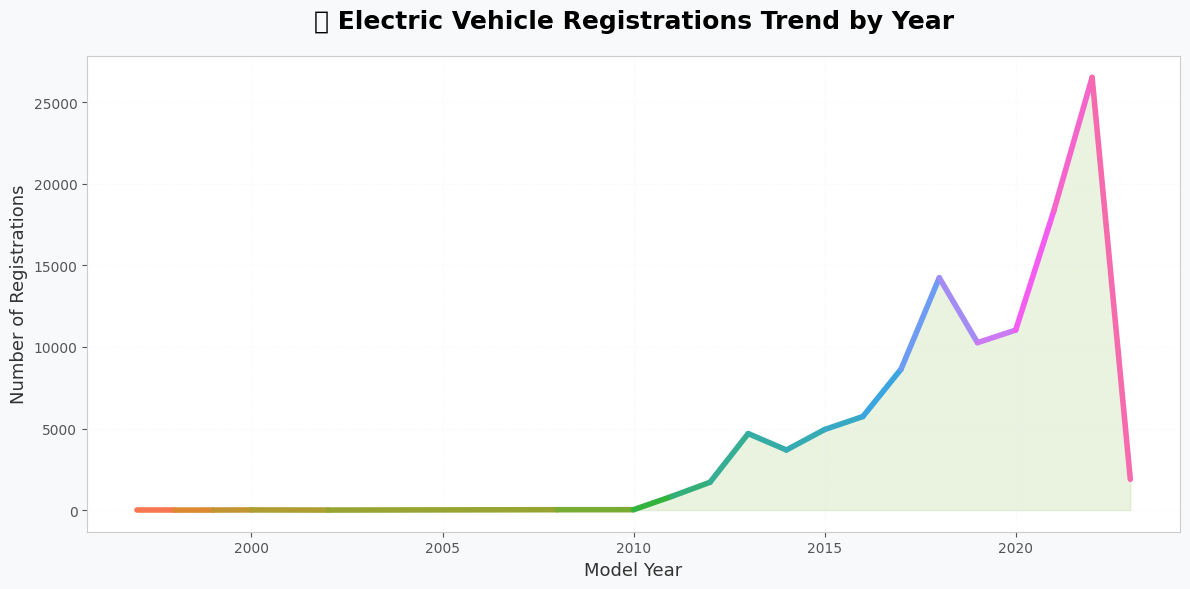

In [16]:
# Trend Over Years — EV Registrations

import sys, os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure 'src' module is found
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from src.visual_style import randomize_palette

# Apply your random trending style
randomize_palette()

# Load your processed data
file_path = "../data/processed/ev_population_imputed.csv"
df = pd.read_csv(file_path)

# --- Data preparation ---
# If Model Year exists, use it; otherwise try registration date
if 'Model Year' in df.columns:
    year_col = 'Model Year'
elif 'Registration Year' in df.columns:
    year_col = 'Registration Year'
else:
    raise ValueError("No 'Model Year' or 'Registration Year' column found!")

# Group by year and count number of vehicles
trend = df.groupby(year_col).size().reset_index(name='Registrations')
trend = trend.sort_values(year_col)

# --- Visualization ---
plt.figure(figsize=(12, 6))

# Create a smooth color gradient effect
colors = sns.color_palette("husl", len(trend))
for i in range(1, len(trend)):
    plt.plot(
        trend[year_col].iloc[i-1:i+1],
        trend['Registrations'].iloc[i-1:i+1],
        color=colors[i],
        linewidth=4,
        solid_capstyle='round'
    )

# Add subtle shadow/blur glow under the line
plt.fill_between(
    trend[year_col],
    trend['Registrations'],
    color=colors[len(trend)//3],
    alpha=0.15
)

# Stylish titles and labels
plt.title("🚗 Electric Vehicle Registrations Trend by Year", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Model Year", fontsize=13)
plt.ylabel("Number of Registrations", fontsize=13)

# Minimal grid and smooth style
plt.grid(alpha=0.2)
plt.tight_layout()

# Save and show
os.makedirs("../reports/figures", exist_ok=True)
plt.savefig("../reports/figures/ev_trend_over_years.png", dpi=300, bbox_inches='tight')
plt.show()


✅ Applied random style: 'pastel_soft' with colors ['#A1C4FD', '#C2E9FB', '#FDCB82', '#F8A1D1', '#A0E7E5']


C:\Users\jatin\AppData\Local\Temp\ipykernel_17620\3855481958.py:62: UserWarning:

Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.

C:\Users\jatin\AppData\Local\Temp\ipykernel_17620\3855481958.py:63: UserWarning:

Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.

c:\Users\jatin\OneDrive\Desktop\Projects\electric-vehicle-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.



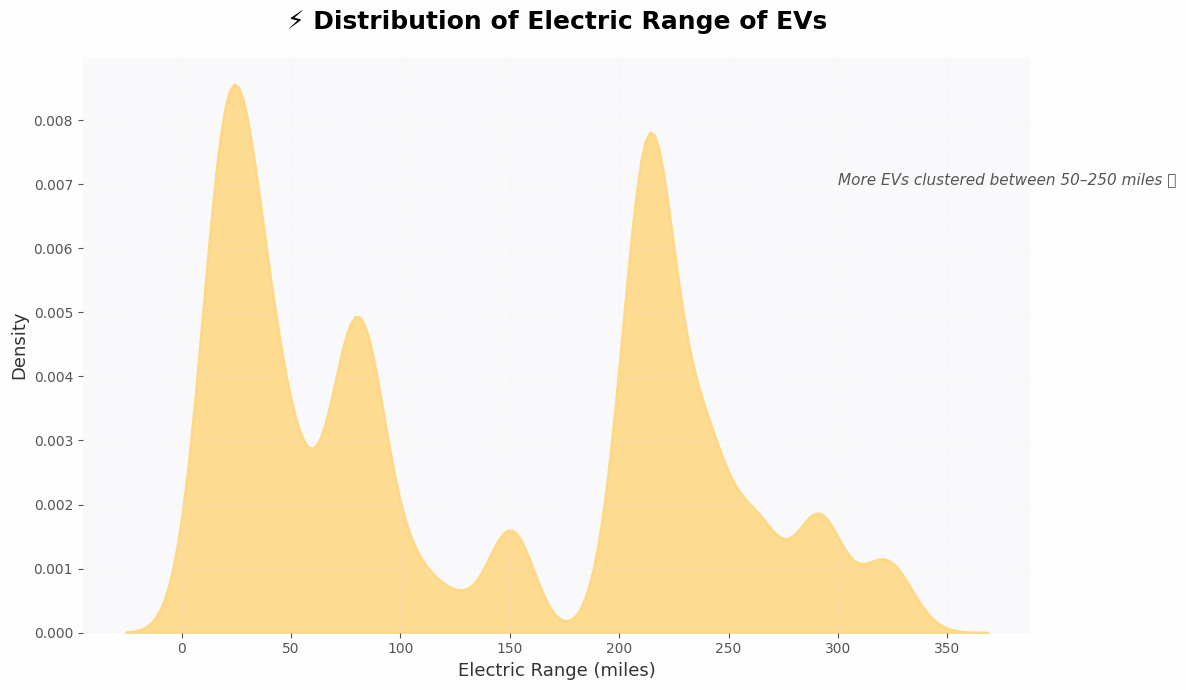

In [17]:
# Cell 7: Distribution of Electric Range (Modern Style)

# Add src folder to path and import style
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import your visual style system
from src.visual_style import randomize_palette, apply_visual_style

# Apply a randomized trendy palette
randomize_palette()

# --- Load Data ---
file_path = "../data/processed/ev_population_imputed.csv"
df = pd.read_csv(file_path)

# --- Prepare Data ---
# Filter out missing or invalid ranges
df = df[df['Electric Range'].notna()]
df = df[df['Electric Range'] > 0]

# Clip long tail values to make visualization clearer
df['Electric Range'] = np.clip(df['Electric Range'], 0, 400)

# --- Create Chart ---
plt.figure(figsize=(12, 7))

# Use a visually appealing gradient-like color
sns.kdeplot(
    data=df,
    x='Electric Range',
    fill=True,
    linewidth=2,
    alpha=0.9,
    color=sns.color_palette("Spectral", 12)[4],
)

# Add chart title and labels
plt.title("⚡ Distribution of Electric Range of EVs", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Electric Range (miles)", fontsize=13)
plt.ylabel("Density", fontsize=13)

# Add styling enhancements
plt.grid(alpha=0.25, linestyle='--')
plt.gca().set_facecolor("#f9f9fb")
plt.gcf().patch.set_facecolor("#fefefe")

# Remove spines for a cleaner, trending look
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Optional: Add a subtle annotation
plt.text(
    x=300, y=0.007,
    s="More EVs clustered between 50–250 miles 🔋",
    fontsize=11,
    style='italic',
    color="#555"
)

# --- Save Chart ---
os.makedirs("../reports/figures", exist_ok=True)
plt.tight_layout()
plt.savefig("../reports/figures/electric_range_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


In [18]:
# Cell 8: Geographic Distribution — EV Count by County

import pandas as pd
import plotly.express as px
import os

# Load the processed dataset
file_path = "../data/processed/ev_population_imputed.csv"
df = pd.read_csv(file_path)

# Aggregate by County
geo_data = df.groupby("County").size().reset_index(name="EV Count")

# Create interactive bar-style geographic visualization
fig = px.choropleth(
    geo_data,
    locations="County",
    locationmode="USA-states",
    color="EV Count",
    scope="usa",
    color_continuous_scale="Viridis",
    title="🌎 Geographic Distribution of EVs by County",
)

fig.update_layout(
    title_font=dict(size=20, family="Poppins", color="#222"),
    geo=dict(bgcolor="rgba(0,0,0,0)"),
    margin=dict(l=10, r=10, t=40, b=10),
)
fig.show()

# Optional: Save static image
os.makedirs("../reports/figures", exist_ok=True)
fig.write_image("../reports/figures/geo_distribution_ev.png")


✅ Applied random style: 'pastel_soft' with colors ['#A1C4FD', '#C2E9FB', '#FDCB82', '#F8A1D1', '#A0E7E5']


C:\Users\jatin\AppData\Local\Temp\ipykernel_17620\2182438599.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\jatin\AppData\Local\Temp\ipykernel_17620\2182438599.py:27: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.

C:\Users\jatin\AppData\Local\Temp\ipykernel_17620\2182438599.py:29: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.

c:\Users\jatin\OneDrive\Desktop\Projects\electric-vehicle-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.



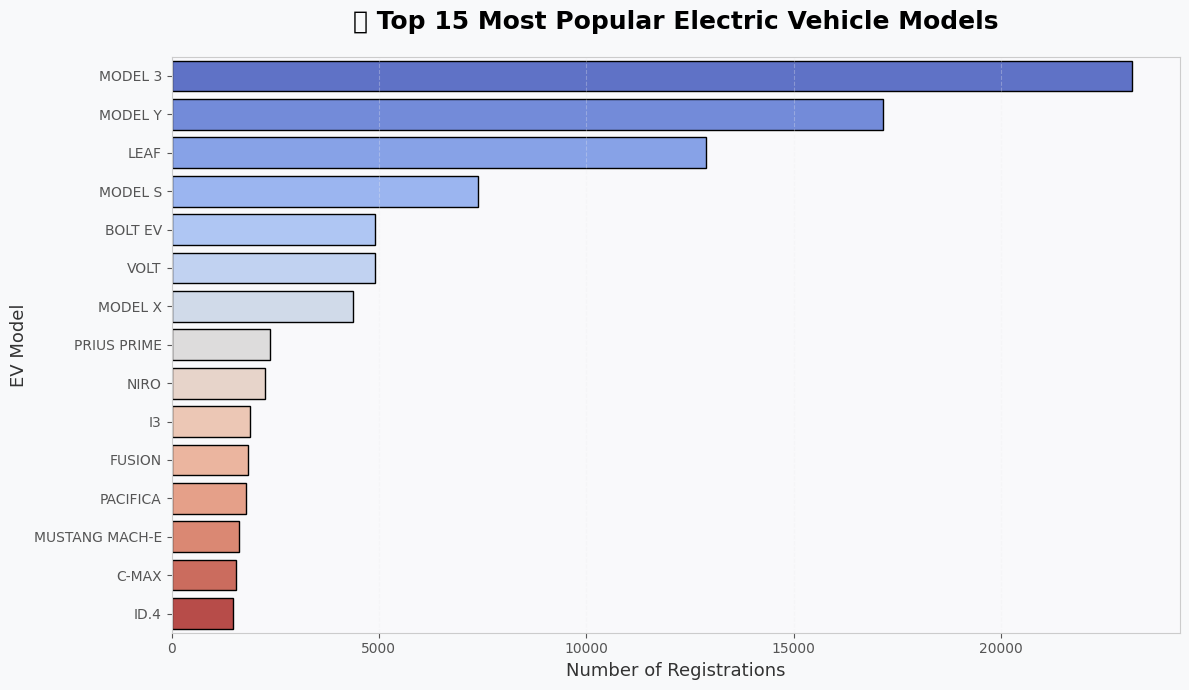

In [19]:
#Popular EV Models — Top 15 (Stylish Horizontal Chart)
# Top 15 Popular EV Models

import seaborn as sns
import matplotlib.pyplot as plt
import os

from src.visual_style import randomize_palette
randomize_palette()

model_counts = df['Model'].value_counts().nlargest(15)

plt.figure(figsize=(12, 7))
sns.barplot(
    x=model_counts.values,
    y=model_counts.index,
    palette="coolwarm",  # modern gradient color palette
    edgecolor="black"
)

plt.title("🚗 Top 15 Most Popular Electric Vehicle Models", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Number of Registrations", fontsize=13)
plt.ylabel("EV Model", fontsize=13)
plt.grid(axis="x", alpha=0.3)
plt.gca().set_facecolor("#f9f9fb")

plt.tight_layout()
os.makedirs("../reports/figures", exist_ok=True)
plt.savefig("../reports/figures/top_ev_models.png", dpi=300, bbox_inches="tight")
plt.show()


In [20]:
# EV Type Distribution (Donut Chart)

import plotly.graph_objects as go

# Count each EV type
type_counts = df["Electric Vehicle Type"].value_counts()

# Create donut chart
fig = go.Figure(data=[
    go.Pie(
        labels=type_counts.index,
        values=type_counts.values,
        hole=0.45,
        textinfo='label+percent',
        marker=dict(colors=["#33CCFF", "#FF6699"], line=dict(color='white', width=2))
    )
])

fig.update_layout(
    title_text="🔋 Distribution of EV Types (BEV vs PHEV)",
    title_font=dict(size=20, family="Poppins"),
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    ),
)
fig.show()

fig.write_image("../reports/figures/ev_type_donut.png")


In [2]:
# clustering snippet (notebook cell)
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("../data/processed/ev_population_features.csv")

# Group by state and compute adoption metrics
agg = df.groupby("State").agg(
    ev_count=("DOL Vehicle ID","count"),
    avg_range=("Electric Range","mean"),
    avg_msrp=("Base MSRP","mean")
).fillna(0)

scaler = StandardScaler()
X = scaler.fit_transform(agg)

# try 2..6 clusters and pick silhouette
best_k, best_score = 2, -1
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    score = silhouette_score(X, km.labels_)
    if score > best_score:
        best_k, best_score = k, score

km = KMeans(n_clusters=best_k, random_state=42, n_init=10).fit(X)
agg["cluster"] = km.labels_

print("Chosen k:", best_k, "silhouette:", round(best_score,3))
agg.reset_index().to_csv("../reports/figures/state_clusters.csv", index=False)


Chosen k: 2 silhouette: 0.765


In [5]:
import pandas as pd

df = pd.read_csv("../data/processed/ev_population_features.csv")
print(df.columns)


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'Legislative District_was_missing', 'Model_was_missing',
       'Vehicle Location_was_missing', 'Electric Utility_was_missing',
       'vehicle_age', 'make_count', 'make_avg_range', 'state_ev_count'],
      dtype='object')


c:\Users\jatin\OneDrive\Desktop\Projects\electric-vehicle-analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\jatin\OneDrive\Desktop\Projects\electric-vehicle-analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jatin\OneDrive\Desktop\Projects\electric-vehicle-analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


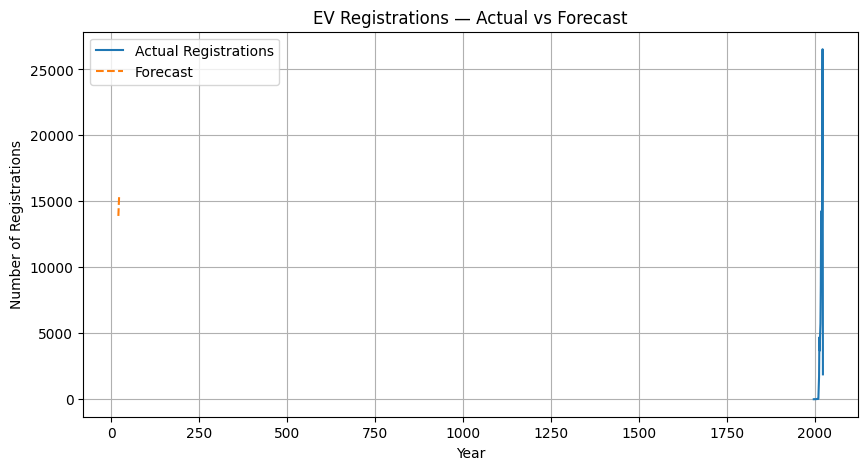

In [7]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv("../data/processed/ev_population_features.csv")

# 2. Group by Model Year instead of reg_year
ts = df.groupby("Model Year").size().rename("count").sort_index()

# 3. Build ETS model
model = ExponentialSmoothing(
    ts,
    trend="add",
    seasonal=None,
    initialization_method="estimated"
)

# 4. Fit model
fit = model.fit()

# 5. Forecast next 3 years
pred = fit.forecast(3)

# 6. Plotting
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts.values, label="Actual Registrations")
plt.plot(pred.index, pred.values, label="Forecast", linestyle="--")
plt.legend()
plt.title("EV Registrations — Actual vs Forecast")
plt.xlabel("Year")
plt.ylabel("Number of Registrations")
plt.grid(True)

plt.savefig("../reports/figures/ev_forecast.png", dpi=200)
plt.show()
